# 期中练习

## 要求

检验对上半学期知识的掌握，课后自行完成，可查阅各种资料。

### 如何提交

- 复制本文件，文件名改为`教学班号-编号.ipynb`。例如刘国强同学是2班第15号，文件名应改为`2-15.ipynb`。
- 在复制文件中答题，每道题的答案紧接题目。
- 答题结束后commit该文件，并提交pull request。



In [270]:
print("2021113449 马志宇")

2021113449 马志宇


In [271]:
import numpy as np
import matplotlib.pyplot as plt

## 练习1

为了分析自变量$x$和因变量$y$的关系，通过测量得到带误差的20个样本数据如下所示

In [272]:
X = np.array([ 0.70846042, -0.68388789,  1.03780474,  1.08334621,  0.77026309,
        0.19722004, -0.46819526, -0.45270204,  0.02362673,  0.06549472,
        0.08898416,  0.59424455, -0.26400365,  0.2456922 ,  0.5114847 ,
       -0.31604016, -1.49329364,  1.24112288,  1.01993764,  1.75634392])

In [273]:
Y = np.array([ 4.49682518,  3.5737603 ,  7.93568197,  3.58719009,  5.38341441,
        5.47930021, -0.9861325 , -0.15686681,  2.36963799,  4.01600211,
       -0.20329642,  3.07728831, -1.30408343,  2.84796441,  2.27915787,
        2.62078689, -1.2855133 ,  4.39242028,  6.24385669,  6.00822241])

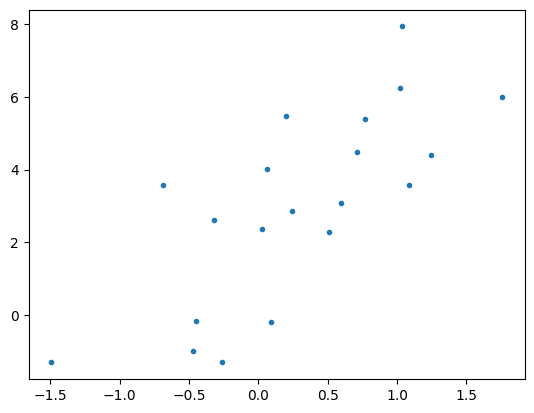

In [274]:
plt.plot(X, Y, ".")

### 1.1 划分训练集和测试集

将20个数据点划分为训练集和测试集，期中训练集为前15个数据点，测试集为后5个。

In [275]:
X_train = X[0:15]
Y_train = Y[0:15]
X_test  = X[15:]
Y_test  = Y[15:]

In [276]:
def regression(X, Y, n):#定义通过AT*A*theta=AT*Y求出theta的函数
    rows = [X**i for i in reversed(range(n))]
    A = np.vstack(rows).T
    theta = np.linalg.solve(A.T@A, A.T@Y)
    return theta

In [277]:
def predict(X, theta):#定义通过theta预测多次多项式值的函数
    n = len(theta)
    degrees = reversed(range(n))
    Y = np.zeros_like(X)
    for w, d in zip(theta, degrees):
        Y += w * X**d
    return Y

### 1.2 数据建模

分别用1到4次多项式函数作为模型拟合训练集中的数据，并分别计算每个模型与数据的均方差（MSE）。

哪一个模型与训练数据拟合最好？

1到4次多项式拟合训练集数据情况如下:


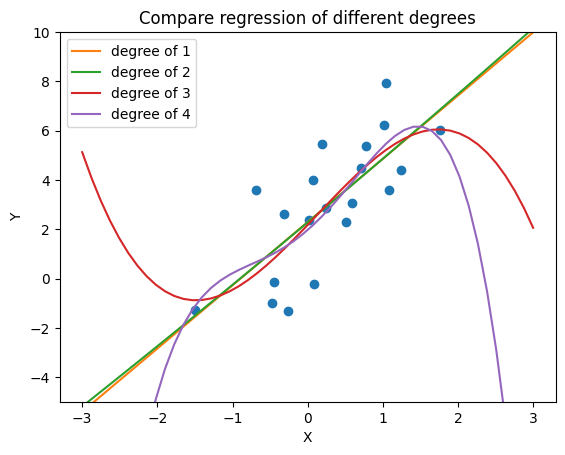

In [278]:
print("1到4次多项式拟合训练集数据情况如下:")
X_model = np.linspace(-3, 3, 50)
plt.plot(X, Y, "o")
for n in range(2, 6):#预测1-4次多项式函数值
    theta = regression(X, Y, n)
    Yhat = predict(X, theta)
    Y_model = predict(X_model, theta)
    plt.plot(X_model, Y_model, label="degree of {}".format(n-1))
plt.ylim(-5, 10)
plt.title("Compare regression of different degrees")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

1到4次多项式拟合训练集数据均方差如下:


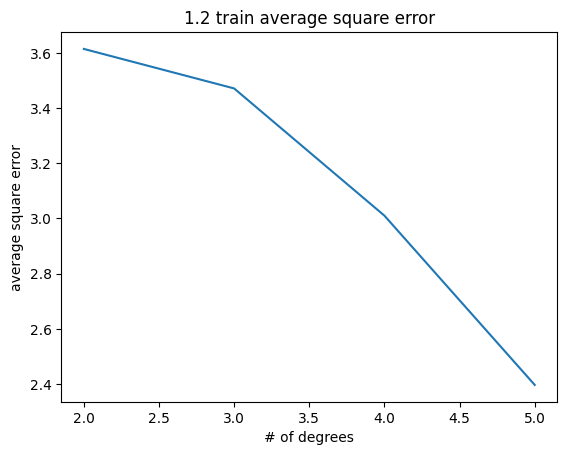

训练集拟合的均方差为[3.6141199809365925, 3.4709875708912987, 3.0102468155333737, 2.397166165471183]
在训练数据集的拟合中,第4次多项式函数模型效果最好


In [279]:
print("1到4次多项式拟合训练集数据均方差如下:")
Ss_test = []
Ns_test = []
Ss = []
Ns = []
for n in range(2, 6):#求出1-4次多项式拟合值与实际值的均方差
    theta = regression(X_train, Y_train, n)
    Yhat = predict(X_train, theta)
    E = Y_train - Yhat
    S = np.dot(E, E) / len(Y_train)
    Ss.append(S)
    Ns.append(n)
plt.plot(Ns, Ss, label="train")
plt.title("1.2 train average square error")
plt.xlabel("# of degrees")
plt.ylabel("average square error")
plt.show()
min_train= min(Ss)
min_train=Ss.index(min_train) # 求train最小值对应索引
print("训练集拟合的均方差为{}".format(Ss))
print("在训练数据集的拟合中,第{}次多项式函数模型效果最好".format(min_train+1))

### 1.3 模型测试
计算4个模型与测试数据的均方差，哪一个模型与测试数据拟合最好？

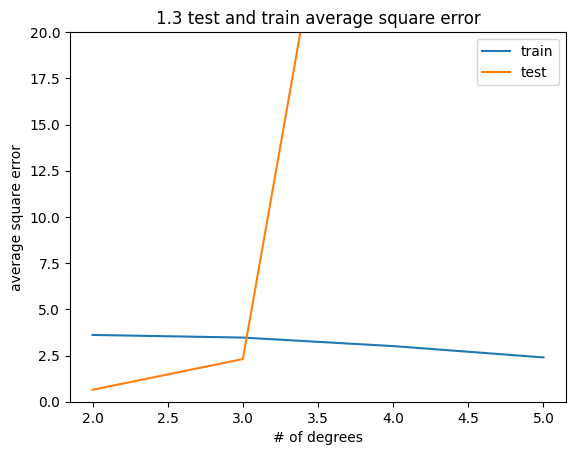

测试集拟合的均方差为[0.6457762674229712, 2.308295305420538, 48.512763928973435, 905.8332589335379]
在测试数据集的拟合中,第1次多项式函数模型效果最好


In [280]:
for n in range(2, 6):#求出训练集所拟合的函数对测试集的拟合效果
    theta = regression(X_train, Y_train, n)
    Yhat_test = predict(X_test, theta)
    E = Y_test - Yhat_test
    S = np.dot(E, E) / len(Y_train)
    Ss_test.append(S)
    Ns_test.append(n)
plt.plot(Ns, Ss, label="train")
plt.plot(Ns_test, Ss_test, label="test")
plt.title("1.3 test and train average square error")
plt.xlabel("# of degrees")
plt.ylabel("average square error")
plt.legend()
plt.ylim(0, 20)
plt.show()
min_test= min(Ss_test)
min_test=Ss_test.index(min_test) # 求test最小值对应索引
print("测试集拟合的均方差为{}".format(Ss_test))
print("在测试数据集的拟合中,第{}次多项式函数模型效果最好".format(min_test+1))

1.2和1.3的答案是否相同？两者的异同有什么意义？

In [281]:
print("1.2与1.3的答案不相同。")
print("这是由于1.2里面使用训练集进行测试会出现过拟合现象，故两次测试结果不同恰能验证模型的有效性")

1.2与1.3的答案不相同。
这是由于1.2里面使用训练集进行测试会出现过拟合现象，故两次测试结果不同恰能验证模型的有效性


## 练习2 人工神经网络

有如下神经网络：
- 输入$x$是2维向量，输出$y$是1维标量
- 包含两个全连接层
    - 第一层有5个神经元，激活函数为sigmoid
    - 第二层有1个神经元，激活函数为relu
- 损失函数为均方差MSE

### 2.1 写出公式

- 写出relu、sigmoid函数的公式
- 写出整个神经网络的公式

In [282]:
print("relu函数的公式为:y = max{0,x}")
print("sigmoid函数的公式为: y = 1/[1+e^(-x)]")
print("整个神经网络的公式为:net1=W_1*x+B_1\n                    out1=1/[1+e^(-net1)]\n                    net2=W_2*out1+B_2\n                    out2=max(0,net2)")

relu函数的公式为:y = max{0,x}
sigmoid函数的公式为: y = 1/[1+e^(-x)]
整个神经网络的公式为:net1=W_1*x+B_1
                    out1=1/[1+e^(-net1)]
                    net2=W_2*out1+B_2
                    out2=max(0,net2)


### 2.2 正向传播

假设已知4个数据点的输入'X'，参考输出'Y'，参数'W_1'、'B_1'、'W_2'、'B_2'，。

- 正向传播计算输出预测值'Y_pred'
- 计算损失值'L'


In [283]:
import numpy as np
import torch
import torch.nn

In [284]:
X = np.array([[-0.05025071,  1.12345037],
       [-1.2771336 , -0.03387919],
       [-0.06085093,  0.83960333],
       [ 0.26666122, -0.15723225]])

注意，这里输入'x'表示为行向量，即'X'中每行表示一个数据点。

In [285]:
Y = np.array([[ 0.34942997],
       [ 0.09796396],
       [ 1.80617515],
       [-0.50698293]])

In [286]:
W1 = np.random.randn(2,5)
b1 = np.random.randn(5)
W2 = np.random.randn(5,1)
b2 = np.random.randn(1,1)

In [287]:
W1 = np.array([[-0.15772071,  2.4169384 ,  1.18656177,  0.74048303,  0.95473468],
       [ 1.75613621,  0.44768404,  0.25003215,  0.52863169, -0.75204543]])

In [288]:
b1 = np.array([-1.00393578, -0.19942106, -1.23939537,  1.62336519, -0.21580562])

In [289]:
W2 = np.array([[ 0.8173788 ],
       [-0.01165333],
       [ 1.10703394],
       [ 0.90372372],
       [ 0.86510315]])

In [290]:
b2 = np.array([[0.277288]])

In [291]:
X = torch.tensor(X, dtype=torch.float)
Y = torch.tensor(Y, dtype=torch.float)
W1 = torch.tensor(W1, dtype=torch.float, requires_grad=True)
W2 = torch.tensor(W2, dtype=torch.float, requires_grad=True)
b1 = torch.tensor(b1, dtype=torch.float, requires_grad=True)
b2 = torch.tensor(b2, dtype=torch.float, requires_grad=True)

In [292]:
def forward(X,b1,b2,W1,W2):
    A1 = torch.mm(X, W1) + b1
    B1 = torch.sigmoid(A1)
    A2 = torch.mm(B1, W2) + b2
    h = torch.relu(A2)
    return A1,B1,A2,h

In [293]:
A1,B1,A2,Y_pred = forward(X,b1,b2,W1,W2)
print("预测值Y_pred:{}".format(Y_pred))
L1 = torch.nn.MSELoss(reduction='sum')
L2 = L1(Y_pred, Y)
L = L2/4
print("损失值L:{}".format(L))

预测值Y_pred:tensor([[2.18514848],
        [1.35081553],
        [2.09965110],
        [1.98338401]], grad_fn=<ReluBackward0>)
损失值L:2.806889057159424


### 2.3 方向传播

计算损失值'L'对参数'W_1'、'B_1'、'W_2'、'B_2'的偏导数。

In [294]:
L2.backward()
# 计算损失函数对参数的偏导数
print("损失函数L对W1的偏导数:{}".format(W1.grad))
print("损失函数L对b1的偏导数:{}".format(b1.grad))
print("损失函数L对W2的偏导数:{}".format(W2.grad))
print("损失函数L对b2的偏导数:{}".format(b2.grad))

损失函数L对W1的偏导数:tensor([[-0.40251270, -0.00182187,  0.04910964, -0.51554191, -0.18737054],
        [ 0.64416027, -0.01111573,  0.81370538,  0.27881461,  0.57317817]])
损失函数L对b1的偏导数:tensor([ 1.81363809, -0.02733097,  2.17171216,  1.43887615,  2.10922050])
损失函数L对W2的偏导数:tensor([[4.82216787],
        [5.34072685],
        [2.64623547],
        [9.70428658],
        [4.25731277]])
损失函数L对b2的偏导数:tensor([[11.74482632]])
